In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле scipy.stats.
Сгенерируйте примеры из распределения

In [72]:
chi2 = sts.chi2
df = 10
sample = chi2.rvs(df, size=100)
sample

array([ 4.1940417 ,  7.09075887,  6.4314241 ,  4.33206305,  9.54407725,
        8.45953922,  8.87647374, 11.16257488,  6.03944959, 17.4474158 ,
       15.93209331, 11.34150147, 12.80197495, 10.49345027, 17.24228561,
        7.50609906, 14.85649656, 11.83217779,  8.92721738,  8.62302732,
        4.88878121, 13.62626362,  7.05367536, 12.62623656,  8.06714836,
        9.31690448, 12.65309231, 11.50392869,  1.7039787 ,  6.28365005,
       12.04515082, 13.55537918, 10.899559  , 12.72647973,  9.32220431,
        6.64235291,  8.26601104,  9.0282452 ,  5.75466656,  9.90634617,
        7.63330402,  6.67194655, 16.57330608,  9.28923025, 16.05516164,
        9.16651844,  7.60765676,  7.46698268,  7.89196091, 15.78975528,
        3.11447647,  7.62202993, 10.7672744 ,  8.61626289, 11.50616255,
        4.66982422,  9.21179705, 10.84656931,  4.18781613,  7.54117244,
        6.90050035,  2.99913328, 10.73815702,  8.84502542, 15.22062396,
        1.99597503,  9.54363866, 12.48041043, 11.76487447,  5.73

In [73]:
chi2.stats(df, moments='mvsk')

(array(10.), array(20.), array(0.89442719), array(1.2))

Постройте гистограмму выборки и теоретическую плотность распределения

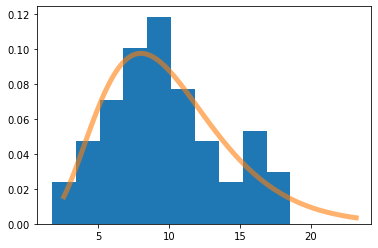

In [74]:
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99,df),100)
plt.hist(sample, density=True)
plt.plot(x, chi2.pdf(x,df), lw=5, alpha=0.6, label='Теоретическая плотность распределения')

In [75]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

9.622480579591254
15.298062852132738


Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

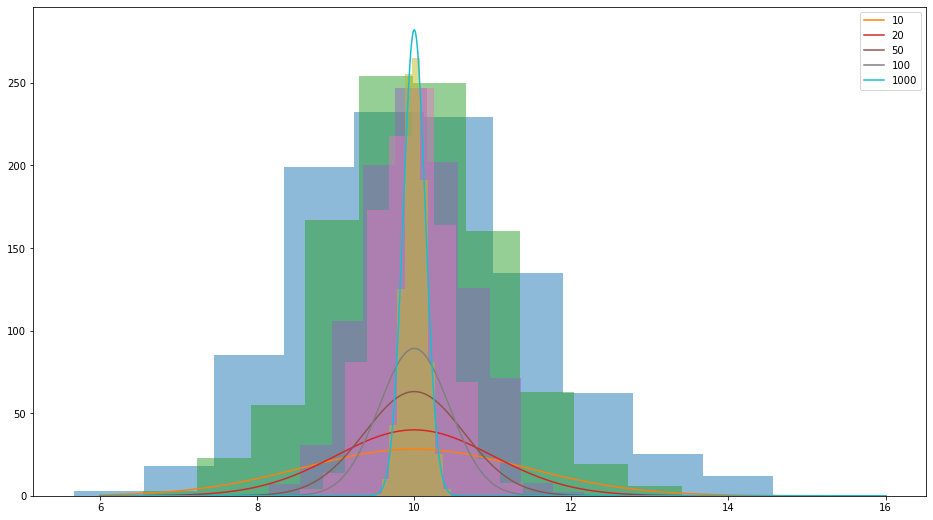

In [124]:
x = np.linspace(6,16, 1000)
plt.figure(figsize=(16,9))
for N in [10, 20, 50, 100, 1000]:
    norm_rv = sts.norm(loc=chi2.mean(df,loc=0, scale=1), scale=chi2.std(df, loc=0, scale=1) / np.sqrt(N))
    pdf = norm_rv.pdf(x)*100
    means = []
    for i in range(1000):
         means.append(np.mean(chi2.rvs(df, size=N)))
    plt.hist(means, alpha=0.5)
    plt.plot(x, pdf, label='Теоретическая плотность', alpha=1)

plt.legend(['10', '20', '50', '100', '1000'])
plt.show()


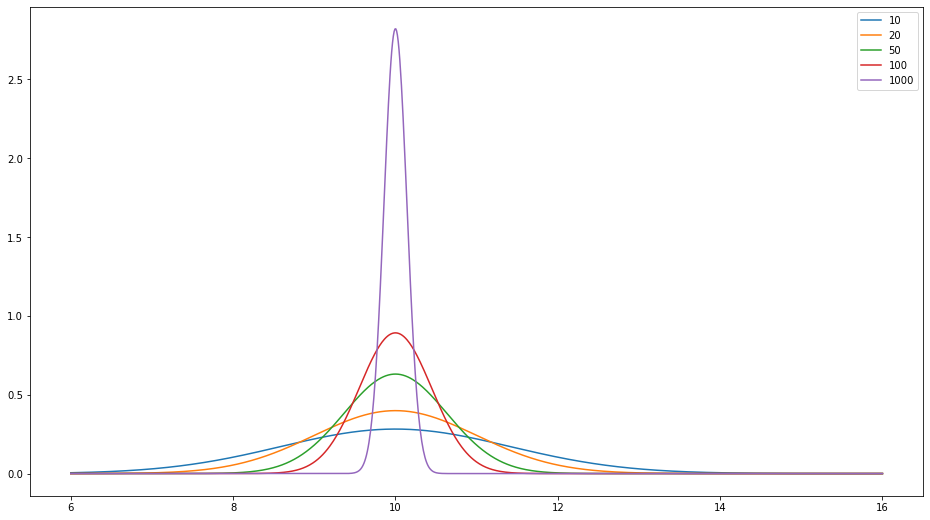

In [127]:
x = np.linspace(6, 16, 1000)
plt.figure(figsize=(16,9))
for N in [10, 20, 50, 100, 1000]:
    norm_rv = sts.norm(loc=chi2.mean(df,loc=0, scale=1), scale=chi2.std(df, loc=0, scale=1) / np.sqrt(N))
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='Теоретическая плотность', alpha=1)

plt.legend(['10', '20', '50', '100', '1000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо? Ваш ответ:

Работает хорошо только при больших значениях выборки

Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций from statsmodels.stats.weightstats import _zconfint_generic. Сравните результаты.

Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [140]:
url = 'https://drive.google.com/uc?export=download&id=1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8'
data=pd.read_csv(url)
total_day_calls = data['total day calls']

20.069084207300854

[]

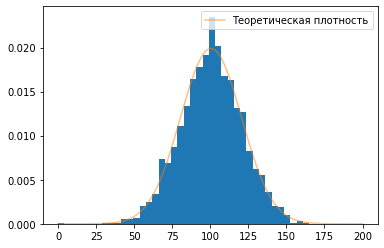

In [168]:
norm_rv = sts.norm(loc=total_day_calls.mean(), scale=total_day_calls.std() / np.sqrt(1))
plt.hist(total_day_calls, density=True, bins=40)
x = np.linspace(0,200, 1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()